Я тут роблю Assignment: Градиентный бустинг над решающими деревьями з "Введение в машинное обучение" на Coursera від Яндекса
2 з 3 прийнято і з 3ім я не знаю чо так :(

Нижче мій код + текст завданнь

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_csv("gbm-data.csv")
data.head(1)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.0,0.497009,0.1,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_array = data.values
Y = data_array[:,0]
X = data_array[:,1:]

In [7]:
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestClassifier

#### 1. Загрузите выборку из файла gbm-data.csv с помощью pandas

...и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [8]:
data = pd.read_csv("gbm-data.csv")
data_array = data.values
Y = data_array[:,0]
X = data_array[:,1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=241)

#### 2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 
...и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
* Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
* Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказаное значение.
* Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.metrics import log_loss
def experiment(learning_rate):
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, learning_rate = learning_rate)
    clf.fit(X_train, Y_train)
    scores_train = np.array([a for a in clf.staged_decision_function(X_train)])[:,:,0]
    scores_test = np.array([a for a in clf.staged_decision_function(X_test)])[:,:,0]
    predicted_train = 1/(1+np.exp(-scores_train))
    predicted_test = 1/(1+np.exp(-scores_test))
    train_loss = np.apply_along_axis(lambda row: log_loss(Y_train, row), 1, predicted_train)
    plt.plot(train_loss)

    test_loss = np.apply_along_axis(lambda row: log_loss(Y_test, row), 1, predicted_test)
    min_loss_pos = test_loss.argmin()
    min_loss_val = test_loss[min_loss_pos]
    plt.plot(test_loss)
    plt.title("Min loss " + str(min_loss_val) + " is at pos " + str(min_loss_pos))
    plt.axvline(x=min_loss_pos)

      Iter       Train Loss   Remaining Time 
         1           1.2613           13.07s
         2           1.1713           12.49s
         3           1.1007           12.09s
         4           1.0524           12.12s
         5           1.0125           12.55s
         6           0.9736           12.38s
         7           0.9441           12.13s
         8           0.9194           11.54s
         9           0.8950           11.44s
        10           0.8786           11.08s
        20           0.7166            9.07s
        30           0.5979            8.50s
        40           0.5150            8.04s
        50           0.4578            7.56s
        60           0.3984            7.13s
        70           0.3420            6.79s
        80           0.3078            6.39s
        90           0.2588            6.05s
       100           0.2241            5.70s
       200           0.0767            1.94s


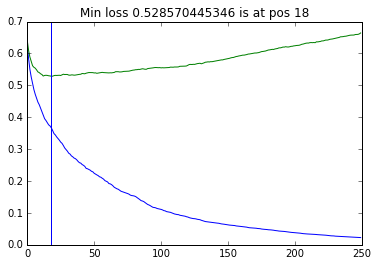

In [11]:
experiment(0.2)

      Iter       Train Loss   Remaining Time 
         1           1.1255           11.83s
         2           1.0043           11.90s
         3           0.9388           12.00s
         4           0.8902           11.07s
         5           0.8324           10.75s
         6           0.7897           10.30s
         7           0.7510            9.88s
         8           0.7200            9.51s
         9           0.7052            9.15s
        10           0.6658            9.13s
        20           0.4941            8.19s
        30           0.3607            7.96s
        40           0.2525            7.73s
        50           0.1863            7.42s
        60           0.1461            7.00s
        70           0.1113            6.63s
        80           0.0902            6.38s
        90           0.0709            6.02s
       100           0.0543            5.66s
       200           0.0050            1.92s


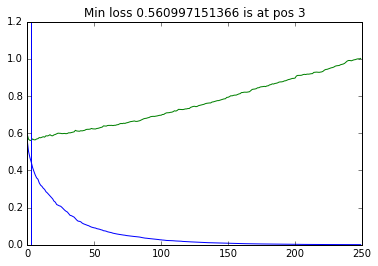

In [12]:
experiment(0.5)

      Iter       Train Loss   Remaining Time 
         1           1.2095           12.39s
         2           1.1006           12.00s
         3           1.0240           11.92s
         4           0.9729           12.04s
         5           0.9387           11.27s
         6           0.8948           11.39s
         7           0.8621           10.97s
         8           0.8360           10.43s
         9           0.8171           10.04s
        10           0.7883            9.75s
        20           0.6164            8.44s
        30           0.4933            7.89s
        40           0.4248            7.21s
        50           0.3345            7.03s
        60           0.2760            6.66s
        70           0.2263            6.33s
        80           0.1971            5.87s
        90           0.1693            5.54s
       100           0.1388            5.25s
       200           0.0294            1.79s


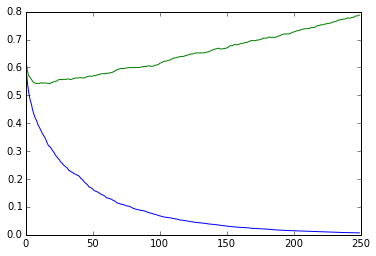

In [162]:
expermiment(0.3)

      Iter       Train Loss   Remaining Time 
         1           1.2613           12.53s
         2           1.1713           12.38s
         3           1.1007           12.18s
         4           1.0524           12.20s
         5           1.0125           12.61s
         6           0.9736           12.50s
         7           0.9441           12.31s
         8           0.9194           11.82s
         9           0.8950           11.84s
        10           0.8786           11.40s
        20           0.7166            9.73s
        30           0.5979            9.32s
        40           0.5150            8.69s
        50           0.4578            8.02s
        60           0.3984            7.50s
        70           0.3420            7.08s
        80           0.3078            6.61s
        90           0.2588            6.25s
       100           0.2241            5.88s
       200           0.0767            1.99s


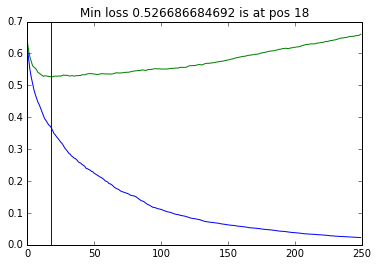

In [13]:
experiment(0.2)

      Iter       Train Loss   Remaining Time 
         1           1.3199           12.41s
         2           1.2644           12.66s
         3           1.2169           12.41s
         4           1.1774           12.20s
         5           1.1405           12.08s
         6           1.1100           12.02s
         7           1.0833           12.06s
         8           1.0612           11.89s
         9           1.0399           11.82s
        10           1.0218           11.79s
        20           0.8811           10.68s
        30           0.7842            9.69s
        40           0.7114            8.98s
        50           0.6590            8.32s
        60           0.6039            7.79s
        70           0.5522            7.34s
        80           0.5217            6.82s
        90           0.4847            6.34s
       100           0.4550            5.90s
       200           0.2401            1.94s


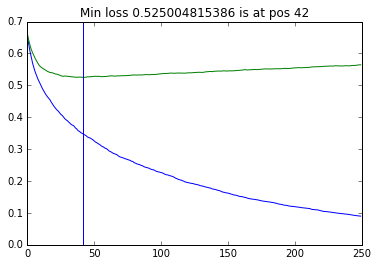

In [14]:
experiment(0.1)

### 3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации 
переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

##### Answer 1, accepted

````
    overfitting
````

### 4. Приведите минимальное значение log-loss на тестовой выборке
... и номер итерации, на котором оно достигается, при learning_rate = 0.2.

###### Answer 2, accepted (from the experiment(0.2) graph)

    0.53 18

### 5. На этих же данных обучите RandomForestClassifier
с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [17]:
from sklearn.ensemble import RandomForestClassifier 

In [18]:
clf = RandomForestClassifier(random_state=241, n_estimators=18)
clf.fit(X_train, Y_train)
predicted = clf.predict_proba(X_test)
log_loss(Y_test, predicted)

0.60387393326797167

### Answer 3, declined :(

    0.60
    
    
I've also tried:
* made sure there's no \n
* n_estimators=19 (e.g. number vs index)
* grid searching n_estimators from 0 to 51 and sumbitting 0.58,0.59,0.61,0.62
* submitting estimate for inverse classes (2.09)
* sent them a note, received the following

    Данный ответ неверен. Мы рекомендуем Вам ещё раз внимательно проверить правильность выполнения каждого шага задания.

### What should I try next, friend?